In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [33]:
import os

# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key=os.environ.get('COMET_API_KEY'), # create a COMET_API_KEY env var in the .env file with containing the api key
    project_name="milestone-2",
    workspace="ift6758-a22-g08",
)

def evaluate(y_true, y_pred):
    return {
      'f1-score': f1_score(y_true, y_pred)
    }

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/ift6758-a22-g08/milestone-2/2b6775a35bfe48bfb85a13513701a2e1
COMET INFO:   Metrics:
COMET INFO:     test_f1-score  : 0.0
COMET INFO:     train_f1-score : 0.0
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1

In [34]:
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

import src.visualization.visualize as VizManager
import src.features.build_features as FeaturesManager
from sklearn.metrics import classification_report


RANDOM_SEED = 42

In [35]:
seasons_year = [2015, 2016, 2017, 2018]
season_type = "Regular"
features_data = FeaturesManager.build_features(seasons_year, season_type)

# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()
features_data.sample(10)

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Shooter ID,Goalie,Goalie ID,...,Game seconds,Last event angle,Rebound,Change in Shot Angle,Speed From Previous Event,Shooter Goal Ratio Last Season,Goalie Goal Ratio Last Season,Num players With,Num players Against,Elapsed time since Power Play
279801,2018020846,82,1,Toronto Maple Leafs (TOR),Shot,Wrist Shot,Auston Matthews,8479318.0,Carey Price,8471679.0,...,946,11.410983,0.0,0.000000,2.553381,0.181818,0.099529,5.0,5.0,0.0
9740,2015020165,23,1,Carolina Hurricanes (CAR),Shot,Wrist Shot,Elias Lindholm,8477496.0,Andrei Vasilevskiy,8476883.0,...,363,-3.122130,0.0,0.000000,11.113955,0.100000,0.081928,5.0,5.0,0.0
2258,2015020038,193,2,Winnipeg Jets (WPG),Shot,Snap Shot,Mark Scheifele,8476460.0,Henrik Lundqvist,8468685.0,...,2079,-47.726311,0.0,0.000000,0.358828,0.088235,0.077502,5.0,4.0,32.0
39742,2015020666,97,1,Nashville Predators (NSH),Shot,Wrist Shot,Kevin Fiala,8477942.0,Devan Dubnyk,8471227.0,...,891,16.313852,0.0,0.000000,8.766562,0.000000,0.070769,5.0,5.0,0.0
251068,2018020373,88,1,Winnipeg Jets (WPG),Shot,Deflected,Mark Scheifele,8476460.0,Casey DeSmith,8479193.0,...,1009,58.134022,0.0,0.000000,10.675167,0.184000,0.078652,5.0,4.0,88.0
232808,2018020076,285,3,Dallas Stars (DAL),Shot,Backhand,Jason Spezza,8469455.0,Craig Anderson,8467950.0,...,3132,47.726311,0.0,0.000000,0.000000,0.057971,0.101810,5.0,5.0,0.0
294170,2018021082,76,1,Vancouver Canucks (VAN),Shot,Snap Shot,Tyler Motte,8477353.0,Henrik Lundqvist,8468685.0,...,1113,62.300527,1.0,64.503125,16.521501,0.078125,0.085462,5.0,5.0,0.0
18691,2015020315,133,2,Dallas Stars (DAL),Shot,Slap Shot,Vernon Fiddler,8469759.0,Craig Anderson,8467950.0,...,1495,7.926927,0.0,0.000000,7.879021,0.098485,0.076720,5.0,5.0,0.0
66479,2015021106,285,3,Nashville Predators (NSH),Goal,Backhand,Filip Forsberg,8476887.0,Ryan Miller,8468011.0,...,3188,52.125016,1.0,115.559965,3.095197,0.109705,0.089316,5.0,5.0,0.0
253024,2018020404,169,2,Nashville Predators (NSH),Shot,Slap Shot,Roman Josi,8474600.0,Cam Ward,8470320.0,...,2200,27.323891,0.0,0.000000,5.721424,0.055336,0.094356,5.0,5.0,0.0


In [36]:
distance_data = features_data[['Shot distance', 'Is Goal']].dropna()
X = distance_data[['Shot distance']]
y = distance_data['Is Goal']

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)
print(X_train.shape)
print(y_train.shape)

(244688, 1)
(244688,)


In [7]:
clf = LogisticRegression(random_state=RANDOM_SEED).fit(X_train, y_train)
print(classification_report(y_valid, clf.predict(X_valid)))


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172



In [8]:
accuracy = clf.score(X_valid, y_valid)
print(f'Accuracy on validation set = {np.around(100.*accuracy, 2)}%')

Accuracy on validation set = 90.62%


0.9061989145360623
Dumb Accuracy on validation set = 90.62%


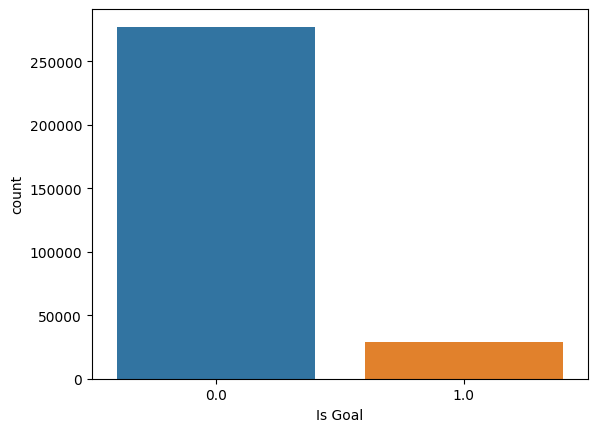

In [9]:
# Accuracy is not the right metric to use, as the classes are unbalanced
num_goals = (y_valid==1).sum()
num_no_goals = (y_valid==0).sum()
print(num_no_goals / (num_no_goals+num_goals))

# features_data['Is Goal'].value_counts().plot(kind = 'bar')
# plt.bar(x=features_data['Is Goal'], height);
sns.countplot(x = features_data['Is Goal'])

# A dumb model that predicts 0 (no goals) all the time reach the same level of performance
def dumb_model(X, y):
    pred = np.zeros_like(X)
    return (y == pred.ravel()).mean()


dumb_accuracy = dumb_model(X_valid, y_valid)
print(f'Dumb Accuracy on validation set = {np.around(100.*dumb_accuracy, 2)}%')

In [20]:
distance_data = features_data[['Shot distance', 'Shot angle', 'Is Goal']]
X = distance_data[['Shot distance', 'Shot angle']]
y = distance_data['Is Goal']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

In [24]:
# Logistic Regression - Distance only
X_distance_train, X_distance_valid = X_train[['Shot distance']], X_valid[['Shot distance']]
clf_distance = LogisticRegression(random_state=RANDOM_SEED).fit(X_distance_train, y_train)
print(classification_report(y_valid, clf_distance.predict(X_distance_valid)))

# Log Metrics
with experiment.train():
    y_train_pred = clf_distance.predict(X_distance_train)
    metrics = evaluate(y_train, y_train_pred)
    experiment.log_metrics(metrics)

with experiment.test():
    y_valid_pred = clf_distance.predict(X_distance_valid)
    metrics = evaluate(y_valid, y_valid_pred)
    experiment.log_metrics(metrics)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172



In [28]:
# Logistic Regression - Angle only
X_angle_train, X_angle_valid = X_train[['Shot angle']], X_valid[['Shot angle']]
clf_angle = LogisticRegression(random_state=RANDOM_SEED).fit(X_angle_train, y_train)
print(classification_report(y_valid, clf_angle.predict(X_angle_valid)))

# Log Metrics
with experiment.train():
    y_train_pred = clf_angle.predict(X_angle_train)
    metrics = evaluate(y_train, y_train_pred)
    experiment.log_metrics(metrics)

with experiment.test():
    y_valid_pred = clf_angle.predict(X_angle_valid)
    metrics = evaluate(y_valid, y_valid_pred)
    experiment.log_metrics(metrics)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172



In [29]:
# Logistic Regression - Distance and Angle
X_distance_angle_train, X_distance_angle_valid = X_train, X_valid
clf_distance_angle = LogisticRegression(random_state=RANDOM_SEED).fit(X_distance_angle_train, y_train)
print(classification_report(y_valid, clf_distance_angle.predict(X_distance_angle_valid)))

# Log Metrics
with experiment.train():
    y_train_pred = clf_distance_angle.predict(X_distance_angle_train)
    metrics = evaluate(y_train, y_train_pred)
    experiment.log_metrics(metrics)

with experiment.test():
    y_valid_pred = clf_distance_angle.predict(X_distance_angle_valid)
    metrics = evaluate(y_valid, y_valid_pred)
    experiment.log_metrics(metrics)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172



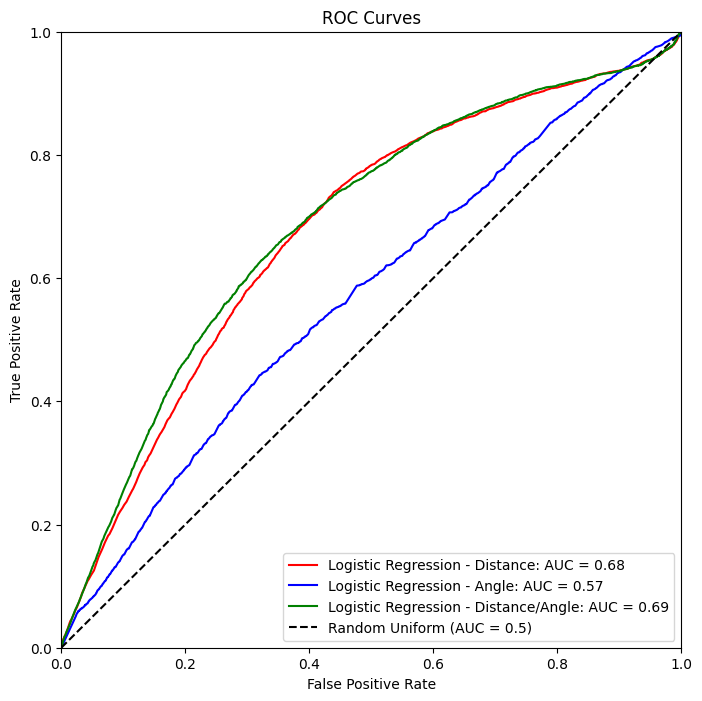

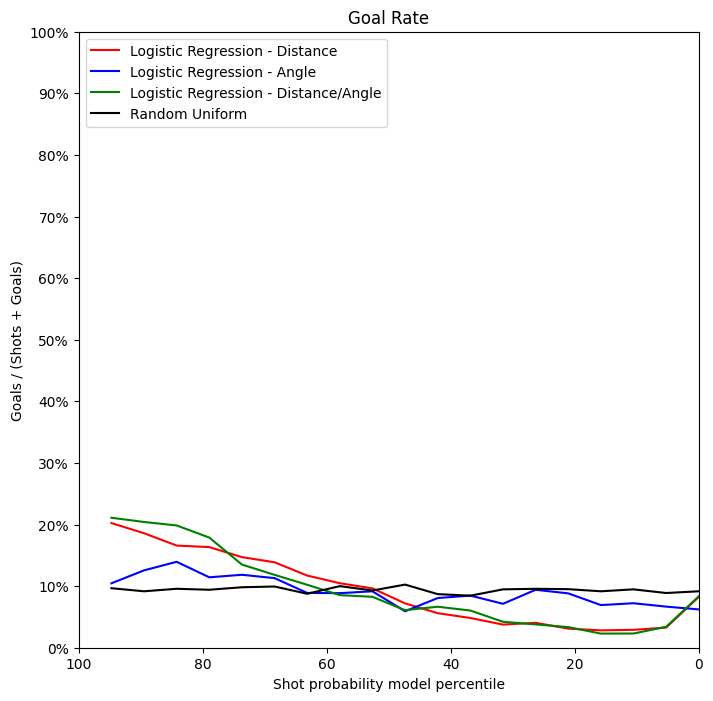

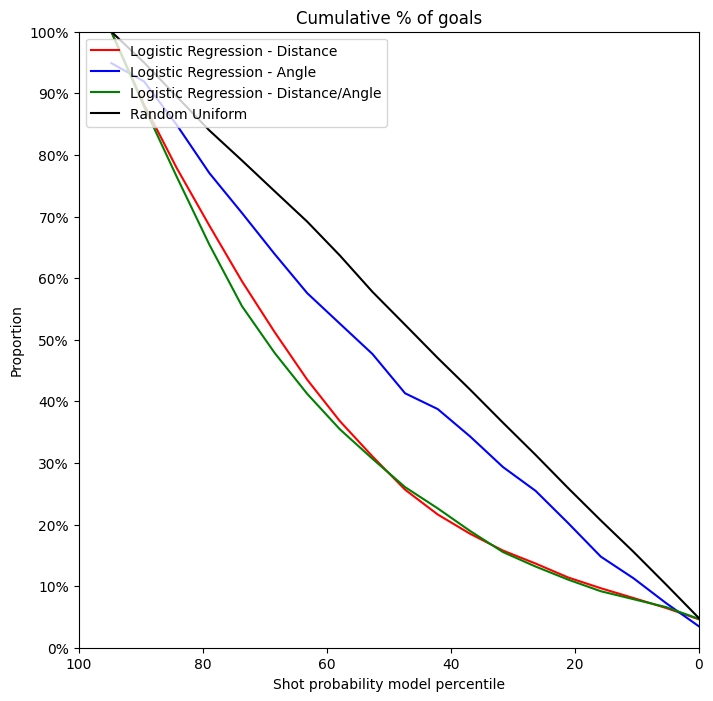

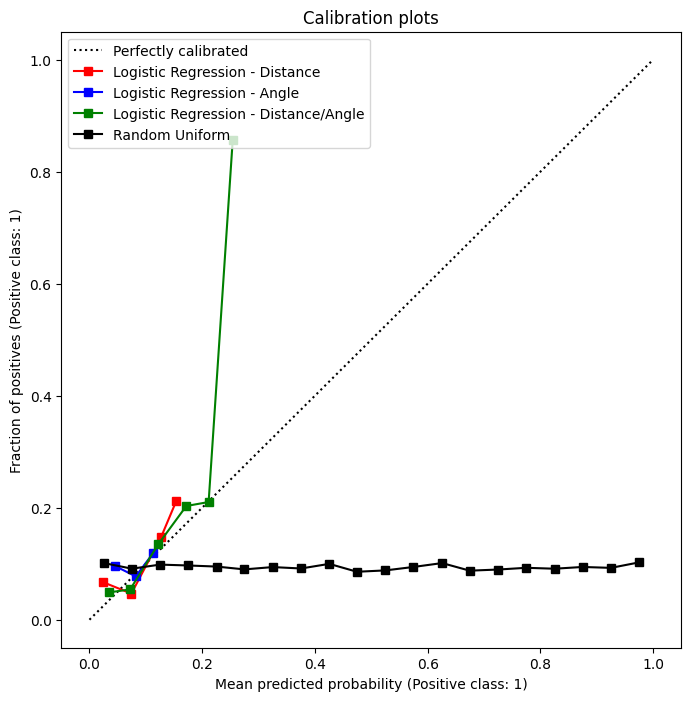

In [30]:
classifiers = [(clf_distance, 'Logistic Regression - Distance', X_distance_valid, y_valid),
               (clf_angle, 'Logistic Regression - Angle', X_angle_valid, y_valid),
               (clf_distance_angle, 'Logistic Regression - Distance/Angle', X_distance_angle_valid, y_valid) ]


VizManager.plot_all_figures(classifiers, add_random=True)